Template Matching es un método para buscar y encontrar la ubicación de una imagen de plantilla en una imagen más grande. OpenCV viene con una función cv.matchTemplate() para este propósito. Simplemente desliza la imagen de plantilla sobre la imagen de entrada (como en la convolución 2D) y compara la plantilla y el parche de la imagen de entrada debajo de la imagen de plantilla. Se implementan varios métodos de comparación en OpenCV. (Puede consultar los documentos para obtener más detalles). Devuelve una imagen en escala de grises, donde cada píxel indica cuánto coincide la vecindad de ese píxel con la plantilla.

Si la imagen de entrada tiene un tamaño (WxH) y la imagen de la plantilla tiene un tamaño (wxh), la imagen de salida tendrá un tamaño de (W-w+1, H-h+1). Una vez que obtenga el resultado, puede usar la función cv.minMaxLoc() para encontrar dónde está el valor máximo/mínimo. Tómelo como la esquina superior izquierda del rectángulo y tome (w,h) como el ancho y el alto del rectángulo. Ese rectángulo es tu región de plantilla.

Coincidencia de plantillas en OpenCV
Aquí, como ejemplo, buscaremos el rostro de Messi en su foto. Entonces creé una plantilla como la siguiente:

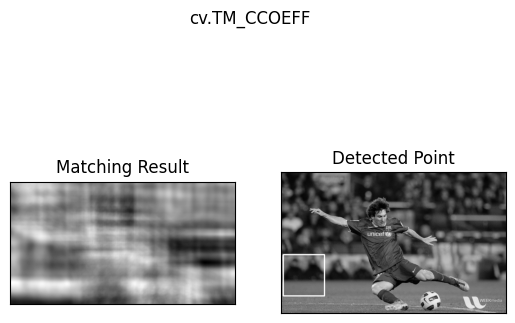

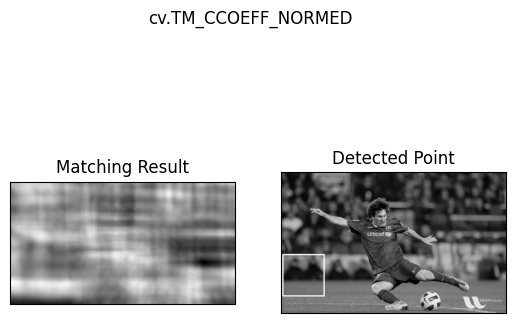

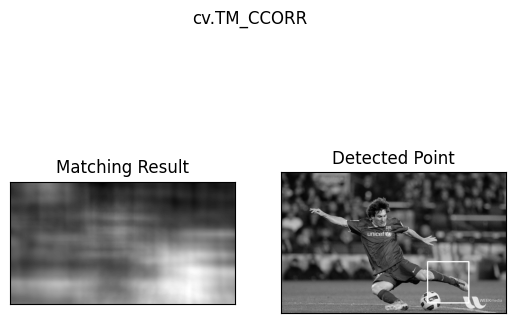

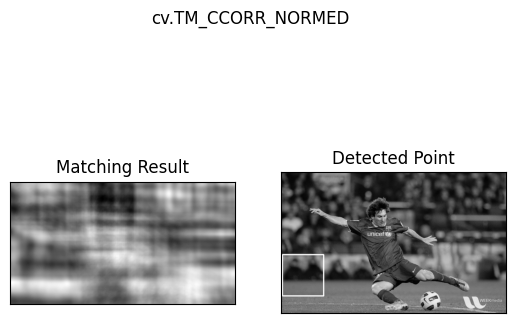

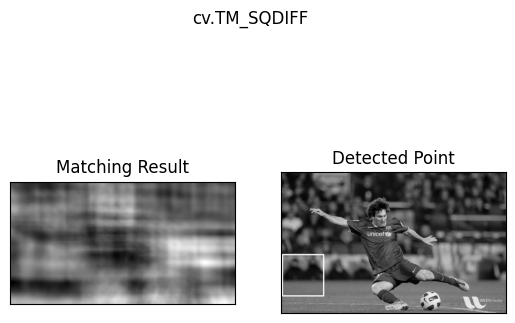

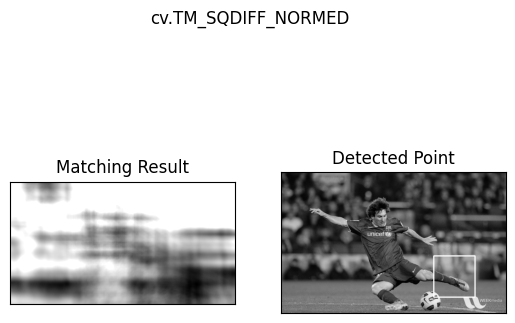

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('resources/messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('resources/template.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

Coincidencia de plantillas con múltiples objetos.

En la sección anterior, buscamos en la imagen el rostro de Messi, que aparece solo una vez en la imagen. Supongamos que está buscando un objeto que tiene múltiples apariciones, cv.minMaxLoc() no le dará todas las ubicaciones. En ese caso, usaremos umbrales. Entonces, en este ejemplo, usaremos una captura de pantalla del famoso juego Mario y encontraremos las monedas en él.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('resources/res_mario.jpg')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('resources/res_mario.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('resources/res.png',img_rgb)

True